Set 1: {0, 2}
Set 2: {1, 3}
Maximum cut value: 4


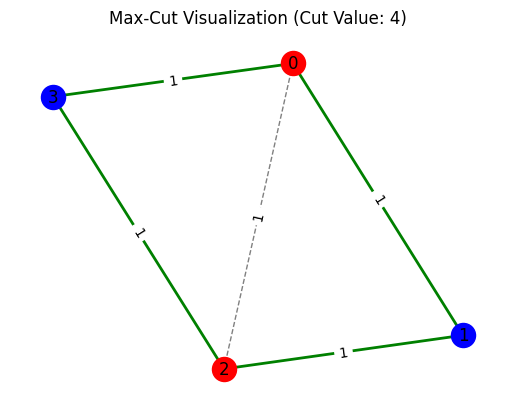

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def max_cut_greedy(graph):
    """
    Solves the max-cut problem using a greedy approach.
    
    Args:
        graph: A NetworkX graph with weighted edges
        
    Returns:
        tuple: (set1, set2, cut_value) where set1 and set2 are the node partitions
              and cut_value is the sum of weights of edges between the sets
    """
    nodes = list(graph.nodes())
    set1 = {nodes[0]}
    set2 = set(nodes[1:])
    
    improved = True
    while improved:
        improved = False
        
        # Try moving each node to the opposite set
        for node in nodes:
            current_set = set1 if node in set1 else set2
            opposite_set = set2 if node in set1 else set1
            
            # Calculate current cut value contribution of this node
            current_cut_value = sum(graph[node][neighbor]['weight'] 
                                  for neighbor in opposite_set
                                  if neighbor in graph[node])
            
            # Calculate potential cut value if moved
            potential_cut_value = sum(graph[node][neighbor]['weight'] 
                                    for neighbor in current_set
                                    if neighbor in graph[node])
            
            # Move node if it improves the cut
            if potential_cut_value > current_cut_value:
                current_set.remove(node)
                opposite_set.add(node)
                improved = True
    
    # Calculate final cut value
    cut_value = sum(graph[u][v]['weight']
                  for u in set1
                  for v in set2
                  if v in graph[u])
    
    return set1, set2, cut_value

def visualize_max_cut(graph, set1, set2):
    """Visualize the graph with the max-cut partition"""
    pos = nx.spring_layout(graph, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, nodelist=list(set1), node_color='red', node_size=300)
    nx.draw_networkx_nodes(graph, pos, nodelist=list(set2), node_color='blue', node_size=300)
    
    # Draw edges
    cut_edges = [(u, v) for u in set1 for v in set2 if v in graph[u]]
    non_cut_edges = [(u, v) for u, v in graph.edges() if (u in set1 and v in set1) or (u in set2 and v in set2)]
    
    nx.draw_networkx_edges(graph, pos, edgelist=cut_edges, width=2, edge_color='green')
    nx.draw_networkx_edges(graph, pos, edgelist=non_cut_edges, width=1, edge_color='gray', style='dashed')
    
    # Draw labels
    nx.draw_networkx_labels(graph, pos)
    edge_labels = {(u, v): graph[u][v]['weight'] for u, v in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.axis('off')
    plt.title(f"Max-Cut Visualization (Cut Value: {cut_value})")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.Graph()
    G.add_edge(0, 1, weight=1)
    G.add_edge(0, 2, weight=1)
    G.add_edge(0, 3, weight=1)
    G.add_edge(1, 2, weight=1)
    G.add_edge(2, 3, weight=1)
    
    # Solve the max-cut problem
    set1, set2, cut_value = max_cut_greedy(G)
    
    print(f"Set 1: {set1}")
    print(f"Set 2: {set2}")
    print(f"Maximum cut value: {cut_value}")
    
    # Visualize the result
    visualize_max_cut(G, set1, set2)